# Healthcare AI Simulation Results Analysis

This notebook provides interactive analysis of simulation results from the VectorizedTemporalRiskSimulator.

## 📋 Table of Contents
1. [Load Results](#load)
2. [Summary Overview](#summary)
3. [Population Analysis](#population)
4. [Temporal Dynamics](#temporal)
5. [Intervention Effectiveness](#interventions)
6. [ML Model Performance](#ml-performance)
7. [Patient Trajectories](#trajectories)
8. [Recommendations](#recommendations)

In [23]:
# Import required libraries
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Try to import plotly for interactive plots, fall back to matplotlib
try:
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("📊 Plotly available - using interactive visualizations")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("📊 Plotly not available - using matplotlib visualizations")
    print("💡 To enable interactive plots, install: pip install plotly kaleido")

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")

📊 Plotly available - using interactive visualizations
📊 Libraries loaded successfully!


## 📂 Load Results {#load}

Specify the path to your simulation results directory:

In [24]:
# Configure results directory
RESULTS_DIR = "../outputs/baseline_simulation/"  # Update this path as needed
results_path = Path(RESULTS_DIR)

print(f"📂 Loading results from: {results_path.absolute()}")
print(f"Directory exists: {results_path.exists()}")

if results_path.exists():
    files = list(results_path.glob("*"))
    print(f"\n📋 Available files ({len(files)}):")
    for file in sorted(files):
        print(f"  - {file.name}")
else:
    print("❌ Results directory not found!")

📂 Loading results from: /Users/michaeldraugelis/Library/CloudStorage/Dropbox/proj/pop-ml-simulator/notebooks/../outputs/baseline_simulation
Directory exists: True

📋 Available files (16):
  - counterfactual_incidents.csv
  - counterfactual_incidents.parquet
  - incident_matrix.csv
  - incident_matrix.parquet
  - intervention_effects.png
  - intervention_matrix.csv
  - intervention_matrix.parquet
  - ml_predictions.csv
  - ml_predictions.parquet
  - patient_risks.csv
  - patient_risks.parquet
  - risk_distribution.png
  - summary_statistics.json
  - temporal_risk_matrix.csv
  - temporal_risk_matrix.parquet
  - temporal_trends.png


In [25]:
# Load summary statistics
stats_file = results_path / "summary_statistics.json"
if stats_file.exists():
    with open(stats_file, 'r') as f:
        stats = json.load(f)
    print("✅ Summary statistics loaded")
else:
    stats = {}
    print("⚠️ Summary statistics not found")

# Load data files
data = {}
data_files = {
    'patient_risks': 'patient_risks.csv',
    'temporal_matrix': 'temporal_risk_matrix.csv',
    'incidents': 'incident_matrix.csv',
    'interventions': 'intervention_matrix.csv',
    'counterfactuals': 'counterfactual_incidents.csv',
    'ml_predictions': 'ml_predictions.csv'
}

for key, filename in data_files.items():
    file_path = results_path / filename
    if file_path.exists():
        data[key] = pd.read_csv(file_path)
        print(f"✅ {key}: {data[key].shape}")
    else:
        print(f"⚠️ {key}: not found")

print(f"\n📊 Data loading complete. {len(data)} datasets loaded.")

✅ Summary statistics loaded
✅ patient_risks: (50000, 2)
✅ temporal_matrix: (50000, 52)
✅ incidents: (50000, 52)
✅ interventions: (50000, 52)
✅ counterfactuals: (50000, 52)
✅ ml_predictions: (200000, 4)

📊 Data loading complete. 6 datasets loaded.


## 📊 Summary Overview {#summary}

In [26]:
# Create summary overview
if stats:
    sim_params = stats.get('simulation_parameters', {})
    pop_stats = stats.get('population_statistics', {})
    int_stats = stats.get('intervention_statistics', {})
    outcome_stats = stats.get('outcome_statistics', {})
    cf_stats = stats.get('counterfactual_statistics', {})
    ml_stats = stats.get('ml_prediction_statistics', {})
    validation = stats.get('validation_results', {})
    
    print("🏥 HEALTHCARE AI SIMULATION RESULTS")
    print("="*50)
    
    print(f"\n📊 SIMULATION SETUP")
    print(f"   Patients: {sim_params.get('n_patients', 'N/A'):,}")
    print(f"   Timesteps: {sim_params.get('n_timesteps', 'N/A')}")
    print(f"   Intervention effectiveness: {sim_params.get('intervention_effectiveness', 0):.1%}")
    print(f"   Prediction times: {sim_params.get('prediction_times', [])}")
    
    print(f"\n👥 POPULATION")
    print(f"   Mean base risk: {pop_stats.get('mean_base_risk', 0):.3f}")
    print(f"   Risk std dev: {pop_stats.get('std_base_risk', 0):.3f}")
    
    print(f"\n🎯 INTERVENTIONS")
    print(f"   Total interventions: {int_stats.get('total_interventions', 0):,}")
    print(f"   Unique patients treated: {int_stats.get('unique_patients_treated', 0):,}")
    print(f"   Coverage: {int_stats.get('intervention_coverage', 0):.1%}")
    
    print(f"\n📈 OUTCOMES")
    print(f"   Actual incidents: {outcome_stats.get('total_incidents', 0):,}")
    print(f"   Counterfactual incidents: {cf_stats.get('counterfactual_incidents', 0):,}")
    
    incident_reduction = cf_stats.get('incident_reduction', 0)
    if incident_reduction > 0:
        print(f"   ✅ Incident reduction: {incident_reduction:.1%}")
    else:
        print(f"   ❌ Incident increase: {abs(incident_reduction):.1%}")
    
    if ml_stats:
        print(f"\n🤖 ML PERFORMANCE")
        print(f"   Mean prediction score: {ml_stats.get('mean_ml_score', 0):.3f}")
        print(f"   Positive prediction rate: {ml_stats.get('positive_prediction_rate', 0):.1%}")
    
    if validation:
        print(f"\n✅ VALIDATION")
        for check, passed in validation.items():
            status = "✅ PASS" if passed else "❌ FAIL"
            print(f"   {check.replace('_', ' ').title()}: {status}")
else:
    print("❌ No summary statistics available")

🏥 HEALTHCARE AI SIMULATION RESULTS

📊 SIMULATION SETUP
   Patients: 50,000
   Timesteps: 52
   Intervention effectiveness: 50.0%
   Prediction times: [0, 12, 24, 36]

👥 POPULATION
   Mean base risk: 0.030
   Risk std dev: 0.040

🎯 INTERVENTIONS
   Total interventions: 29,508
   Unique patients treated: 9,158
   Coverage: 1.1%

📈 OUTCOMES
   Actual incidents: 1,490
   Counterfactual incidents: 1,600
   ✅ Incident reduction: 6.9%

🤖 ML PERFORMANCE
   Mean prediction score: 0.272
   Positive prediction rate: 51.2%

✅ VALIDATION
   Population Mean: ✅ PASS
   Temporal Autocorrelation: ✅ PASS
   Intervention Coverage: ❌ FAIL


## 👥 Population Analysis {#population}

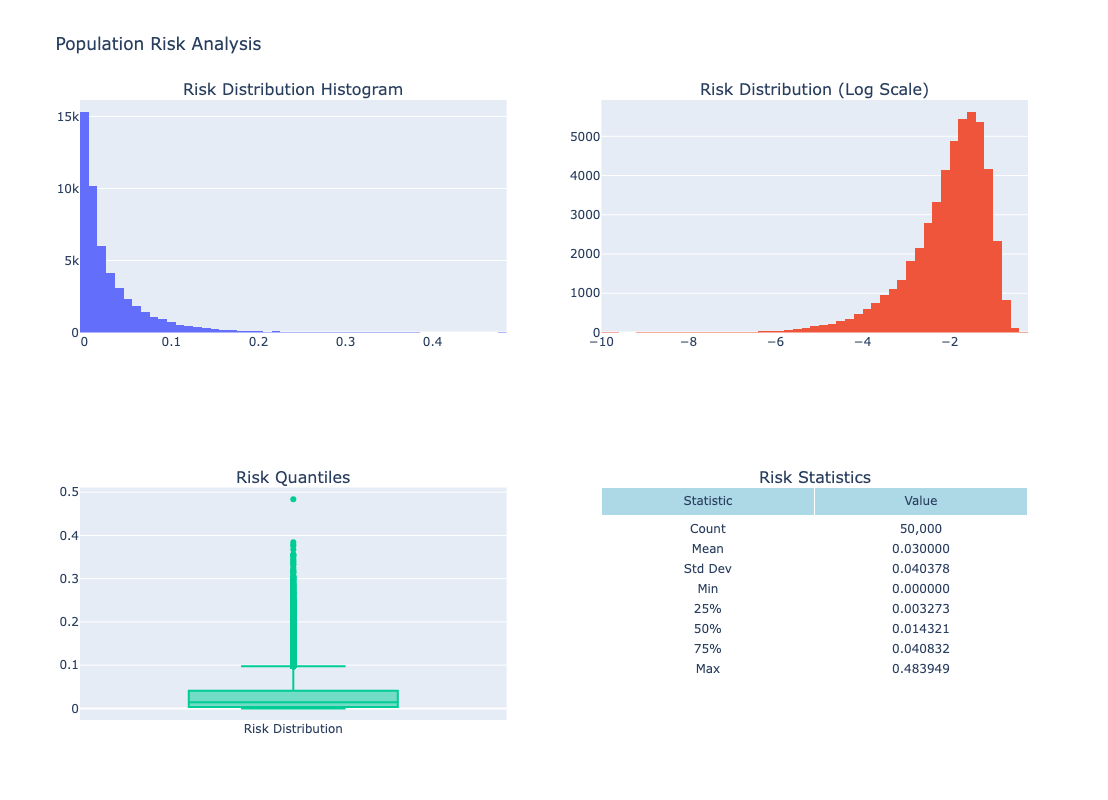

📊 Population Risk Statistics:
   Count: 50,000
   Mean: 0.030000
   Std Dev: 0.040378
   Min: 0.000000
   Max: 0.483949
   Median: 0.014321


In [27]:
# Population risk distribution analysis
if 'patient_risks' in data:
    risks = data['patient_risks']['base_risk']
    
    if PLOTLY_AVAILABLE:
        # Create interactive risk distribution plot with plotly
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=[
                'Risk Distribution Histogram',
                'Risk Distribution (Log Scale)',
                'Risk Quantiles',
                'Risk Statistics'
            ],
            specs=[[{"type": "histogram"}, {"type": "histogram"}],
                   [{"type": "box"}, {"type": "table"}]]
        )
        
        # Histogram
        fig.add_trace(
            go.Histogram(x=risks, nbinsx=50, name="Risk Distribution"),
            row=1, col=1
        )
        
        # Log scale histogram
        fig.add_trace(
            go.Histogram(x=np.log10(risks + 1e-10), nbinsx=50, name="Log Risk"),
            row=1, col=2
        )
        
        # Box plot
        fig.add_trace(
            go.Box(y=risks, name="Risk Distribution"),
            row=2, col=1
        )
        
        # Statistics table
        risk_stats = {
            'Statistic': ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max'],
            'Value': [
                f"{len(risks):,}",
                f"{risks.mean():.6f}",
                f"{risks.std():.6f}",
                f"{risks.min():.6f}",
                f"{risks.quantile(0.25):.6f}",
                f"{risks.median():.6f}",
                f"{risks.quantile(0.75):.6f}",
                f"{risks.max():.6f}"
            ]
        }
        
        fig.add_trace(
            go.Table(
                header=dict(values=list(risk_stats.keys()), fill_color='lightblue'),
                cells=dict(values=list(risk_stats.values()), fill_color='white')
            ),
            row=2, col=2
        )
        
        fig.update_layout(
            height=800,
            title_text="Population Risk Analysis",
            showlegend=False
        )
        
        fig.show()
    else:
        # Matplotlib fallback
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Population Risk Analysis', fontsize=16)
        
        # Risk distribution histogram
        axes[0, 0].hist(risks, bins=50, alpha=0.7, edgecolor='black')
        axes[0, 0].set_xlabel('Base Annual Risk')
        axes[0, 0].set_ylabel('Number of Patients')
        axes[0, 0].set_title('Risk Distribution Histogram')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Log scale histogram
        axes[0, 1].hist(np.log10(risks + 1e-10), bins=50, alpha=0.7, edgecolor='black', color='orange')
        axes[0, 1].set_xlabel('Log10(Base Risk)')
        axes[0, 1].set_ylabel('Number of Patients')
        axes[0, 1].set_title('Risk Distribution (Log Scale)')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Box plot
        axes[1, 0].boxplot(risks)
        axes[1, 0].set_ylabel('Risk Level')
        axes[1, 0].set_title('Risk Distribution Box Plot')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Statistics table - fix the f-string syntax
        axes[1, 1].axis('off')
        
        # Create statistics text (avoid f-string with escaped triple quotes)
        count_val = len(risks)
        mean_val = risks.mean()
        std_val = risks.std()
        min_val = risks.min()
        q25_val = risks.quantile(0.25)
        median_val = risks.median()
        q75_val = risks.quantile(0.75)
        max_val = risks.max()
        
        risk_stats_text = f"""Risk Statistics
        
Count: {count_val:,}
Mean: {mean_val:.6f}
Std Dev: {std_val:.6f}
Min: {min_val:.6f}
25%: {q25_val:.6f}
50%: {median_val:.6f}
75%: {q75_val:.6f}
Max: {max_val:.6f}"""
        
        axes[1, 1].text(0.1, 0.9, risk_stats_text, transform=axes[1, 1].transAxes,
                        fontsize=12, verticalalignment='top', fontfamily='monospace',
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
    # Print summary statistics
    print("📊 Population Risk Statistics:")
    print(f"   Count: {len(risks):,}")
    print(f"   Mean: {risks.mean():.6f}")
    print(f"   Std Dev: {risks.std():.6f}")
    print(f"   Min: {risks.min():.6f}")
    print(f"   Max: {risks.max():.6f}")
    print(f"   Median: {risks.median():.6f}")
else:
    print("❌ Patient risk data not available")

## ⏰ Temporal Dynamics {#temporal}

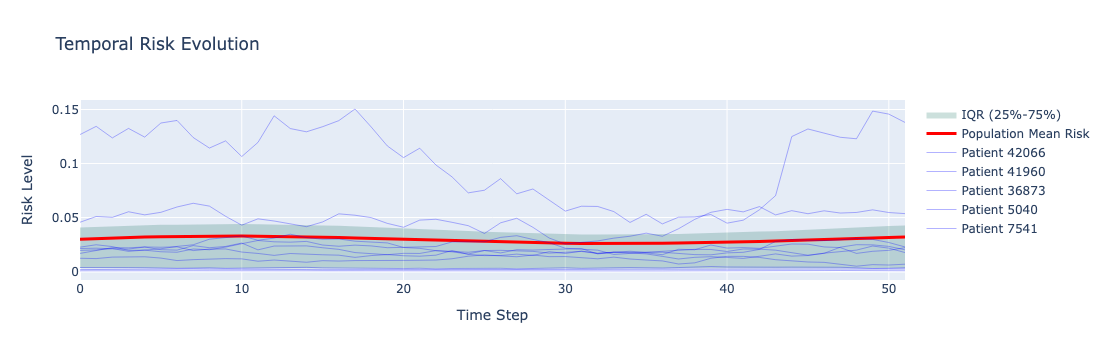

📊 Temporal Dynamics Summary:
   Average risk range per patient: 0.0234
   Population risk volatility: 0.0024
   Starting population risk: 0.0300
   Ending population risk: 0.0320


In [28]:
# Temporal risk evolution analysis
if 'temporal_matrix' in data:
    temporal_data = data['temporal_matrix']
    
    # Calculate population-level statistics over time
    mean_risk_over_time = temporal_data.mean(axis=0)
    std_risk_over_time = temporal_data.std(axis=0)
    q25_over_time = temporal_data.quantile(0.25, axis=0)
    q75_over_time = temporal_data.quantile(0.75, axis=0)
    
    # Create interactive temporal plot
    fig = go.Figure()
    
    # Add confidence band
    time_steps = list(range(len(mean_risk_over_time)))
    
    fig.add_trace(go.Scatter(
        x=time_steps + time_steps[::-1],
        y=list(q75_over_time) + list(q25_over_time[::-1]),
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='IQR (25%-75%)'
    ))
    
    # Add mean line
    fig.add_trace(go.Scatter(
        x=time_steps,
        y=mean_risk_over_time,
        mode='lines',
        name='Population Mean Risk',
        line=dict(color='red', width=3)
    ))
    
    # Add sample patient trajectories
    n_sample_patients = min(50, len(temporal_data))
    sample_indices = np.random.choice(len(temporal_data), n_sample_patients, replace=False)
    
    for i, idx in enumerate(sample_indices[:10]):  # Show only 10 for clarity
        patient_risks = temporal_data.iloc[idx]
        fig.add_trace(go.Scatter(
            x=time_steps,
            y=patient_risks,
            mode='lines',
            name=f'Patient {idx}' if i < 5 else None,
            line=dict(color='blue', width=1),
            opacity=0.3,
            showlegend=i < 5
        ))
    
    fig.update_layout(
        title='Temporal Risk Evolution',
        xaxis_title='Time Step',
        yaxis_title='Risk Level',
        hovermode='x unified'
    )
    
    fig.show()
    
    # Calculate temporal statistics
    print("📊 Temporal Dynamics Summary:")
    print(f"   Average risk range per patient: {(temporal_data.max(axis=1) - temporal_data.min(axis=1)).mean():.4f}")
    print(f"   Population risk volatility: {mean_risk_over_time.std():.4f}")
    print(f"   Starting population risk: {mean_risk_over_time.iloc[0]:.4f}")
    print(f"   Ending population risk: {mean_risk_over_time.iloc[-1]:.4f}")
else:
    print("❌ Temporal risk data not available")

## 🎯 Intervention Effectiveness {#interventions}

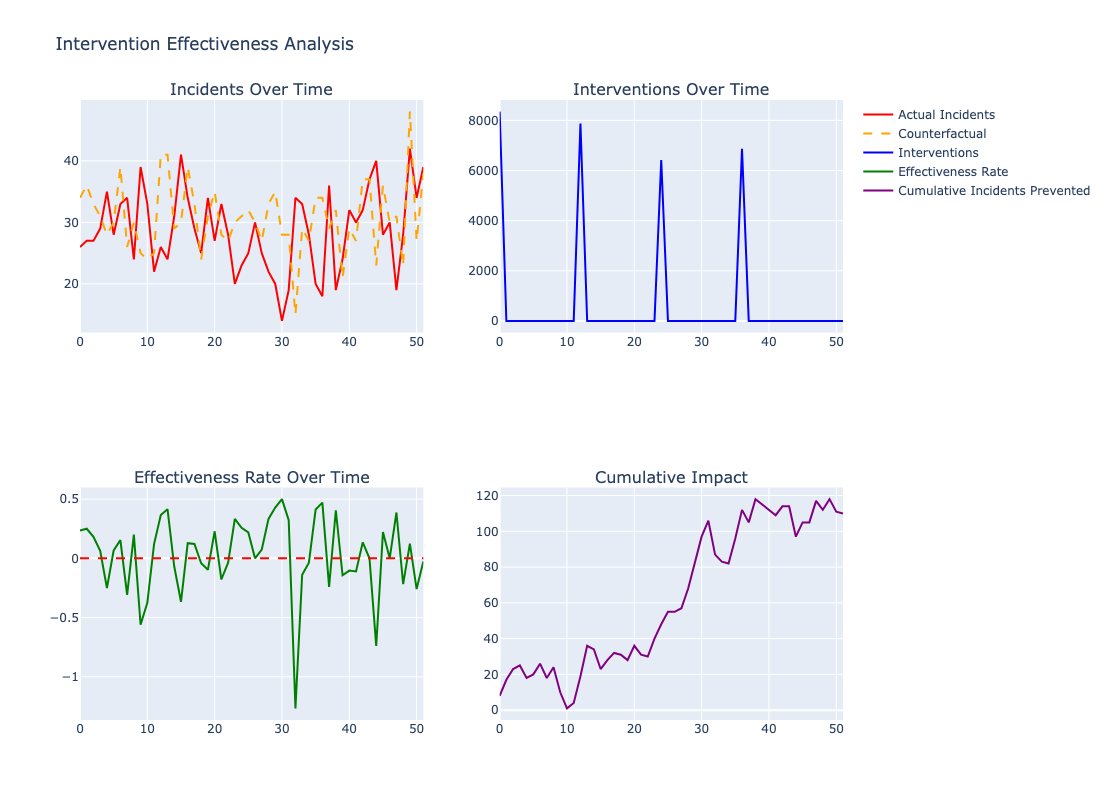

🎯 Intervention Effectiveness Summary:
   Total interventions: 29,508
   Total actual incidents: 1,490
   Total counterfactual incidents: 1,600
   Incidents prevented: 110
   Overall effectiveness: 6.9%
   Number needed to treat: 268.3


In [29]:
# Intervention effectiveness analysis
if 'incidents' in data and 'counterfactuals' in data and 'interventions' in data:
    incidents = data['incidents']
    counterfactuals = data['counterfactuals']
    interventions = data['interventions']
    
    # Calculate effectiveness over time
    actual_by_time = incidents.sum(axis=0)
    counterfactual_by_time = counterfactuals.sum(axis=0)
    interventions_by_time = interventions.sum(axis=0)
    
    # Calculate effectiveness rate
    effectiveness_by_time = np.where(
        counterfactual_by_time > 0,
        (counterfactual_by_time - actual_by_time) / counterfactual_by_time,
        0
    )
    
    # Create effectiveness dashboard
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            'Incidents Over Time',
            'Interventions Over Time',
            'Effectiveness Rate Over Time',
            'Cumulative Impact'
        ]
    )
    
    # Incidents comparison
    time_steps = list(range(len(actual_by_time)))
    fig.add_trace(
        go.Scatter(x=time_steps, y=actual_by_time, name='Actual Incidents', line=dict(color='red')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=time_steps, y=counterfactual_by_time, name='Counterfactual', line=dict(color='orange', dash='dash')),
        row=1, col=1
    )
    
    # Interventions over time
    fig.add_trace(
        go.Scatter(x=time_steps, y=interventions_by_time, name='Interventions', line=dict(color='blue')),
        row=1, col=2
    )
    
    # Effectiveness rate
    fig.add_trace(
        go.Scatter(x=time_steps, y=effectiveness_by_time, name='Effectiveness Rate', line=dict(color='green')),
        row=2, col=1
    )
    fig.add_hline(y=0, line_dash="dash", line_color="red", row=2, col=1)
    
    # Cumulative impact
    cumulative_prevented = np.cumsum(counterfactual_by_time - actual_by_time)
    fig.add_trace(
        go.Scatter(x=time_steps, y=cumulative_prevented, name='Cumulative Incidents Prevented', line=dict(color='purple')),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800,
        title_text="Intervention Effectiveness Analysis",
        showlegend=True
    )
    
    fig.show()
    
    # Summary statistics
    total_actual = actual_by_time.sum()
    total_counterfactual = counterfactual_by_time.sum()
    total_interventions = interventions_by_time.sum()
    
    print("🎯 Intervention Effectiveness Summary:")
    print(f"   Total interventions: {total_interventions:,}")
    print(f"   Total actual incidents: {total_actual:,}")
    print(f"   Total counterfactual incidents: {total_counterfactual:,}")
    print(f"   Incidents prevented: {total_counterfactual - total_actual:,}")
    
    if total_counterfactual > 0:
        overall_effectiveness = (total_counterfactual - total_actual) / total_counterfactual
        print(f"   Overall effectiveness: {overall_effectiveness:.1%}")
    
    if total_interventions > 0:
        nnt = total_interventions / max(1, total_counterfactual - total_actual)
        print(f"   Number needed to treat: {nnt:.1f}")
else:
    print("❌ Intervention effectiveness data not available")

## 🤖 ML Model Performance {#ml-performance}

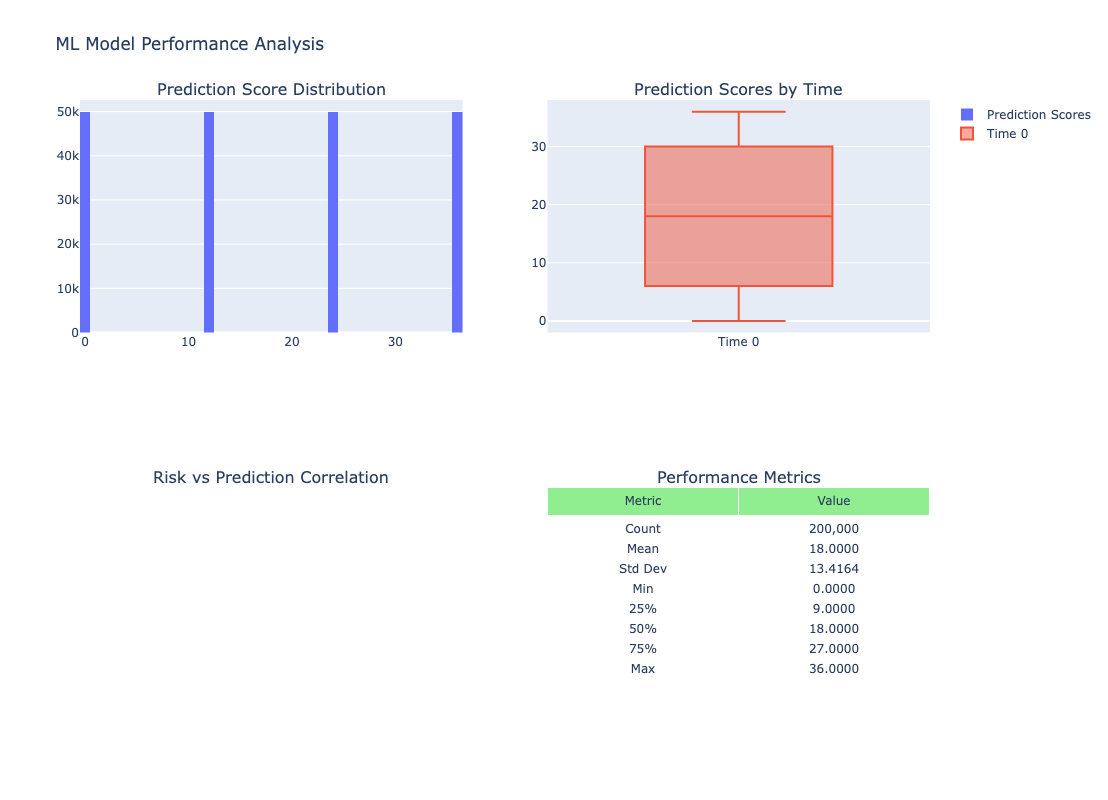

🤖 ML Model Performance Summary:
   Total predictions: 200,000
   Mean prediction score: 18.0000
   Prediction range: 0.0000 - 36.0000
   Positive predictions (>0.5): 150,000 (75.0%)


In [30]:
# ML model performance analysis
if 'ml_predictions' in data:
    ml_data = data['ml_predictions']
    
    # Identify prediction columns
    prediction_cols = [col for col in ml_data.columns if 'prediction' in col.lower() or col.startswith('time_')]
    
    if prediction_cols:
        # Combine all predictions
        all_predictions = []
        for col in prediction_cols:
            valid_preds = ml_data[col].dropna()
            all_predictions.extend(valid_preds)
        
        all_predictions = np.array(all_predictions)
        
        # Create ML performance dashboard
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=[
                'Prediction Score Distribution',
                'Prediction Scores by Time',
                'Risk vs Prediction Correlation',
                'Performance Metrics'
            ],
            specs=[[{"type": "histogram"}, {"type": "scatter"}],
                   [{"type": "scatter"}, {"type": "table"}]]
        )
        
        # Prediction distribution
        fig.add_trace(
            go.Histogram(x=all_predictions, nbinsx=50, name="Prediction Scores"),
            row=1, col=1
        )
        
        # Predictions by time (if multiple prediction times)
        for i, col in enumerate(prediction_cols[:4]):  # Show up to 4 time points
            valid_preds = ml_data[col].dropna()
            fig.add_trace(
                go.Box(y=valid_preds, name=f"Time {i}"),
                row=1, col=2
            )
        
        # Risk vs prediction correlation (if patient risks available)
        if 'patient_risks' in data and len(ml_data) == len(data['patient_risks']):
            risks = data['patient_risks']['base_risk']
            
            # Use first prediction time for correlation
            first_predictions = ml_data[prediction_cols[0]].dropna()
            matching_risks = risks.iloc[:len(first_predictions)]
            
            fig.add_trace(
                go.Scatter(
                    x=matching_risks,
                    y=first_predictions,
                    mode='markers',
                    name='Risk vs Prediction',
                    opacity=0.6
                ),
                row=2, col=1
            )
        
        # Performance metrics table
        perf_stats = {
            'Metric': ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max'],
            'Value': [
                f"{len(all_predictions):,}",
                f"{np.mean(all_predictions):.4f}",
                f"{np.std(all_predictions):.4f}",
                f"{np.min(all_predictions):.4f}",
                f"{np.percentile(all_predictions, 25):.4f}",
                f"{np.median(all_predictions):.4f}",
                f"{np.percentile(all_predictions, 75):.4f}",
                f"{np.max(all_predictions):.4f}"
            ]
        }
        
        fig.add_trace(
            go.Table(
                header=dict(values=list(perf_stats.keys()), fill_color='lightgreen'),
                cells=dict(values=list(perf_stats.values()), fill_color='white')
            ),
            row=2, col=2
        )
        
        fig.update_layout(
            height=800,
            title_text="ML Model Performance Analysis",
            showlegend=True
        )
        
        fig.show()
        
        # Print ML summary
        print("🤖 ML Model Performance Summary:")
        print(f"   Total predictions: {len(all_predictions):,}")
        print(f"   Mean prediction score: {np.mean(all_predictions):.4f}")
        print(f"   Prediction range: {np.min(all_predictions):.4f} - {np.max(all_predictions):.4f}")
        print(f"   Positive predictions (>0.5): {np.sum(all_predictions > 0.5):,} ({np.mean(all_predictions > 0.5):.1%})")
    else:
        print("⚠️ No prediction columns found in ML data")
else:
    print("❌ ML prediction data not available")

## 🧑‍⚕️ Patient Trajectories {#trajectories}

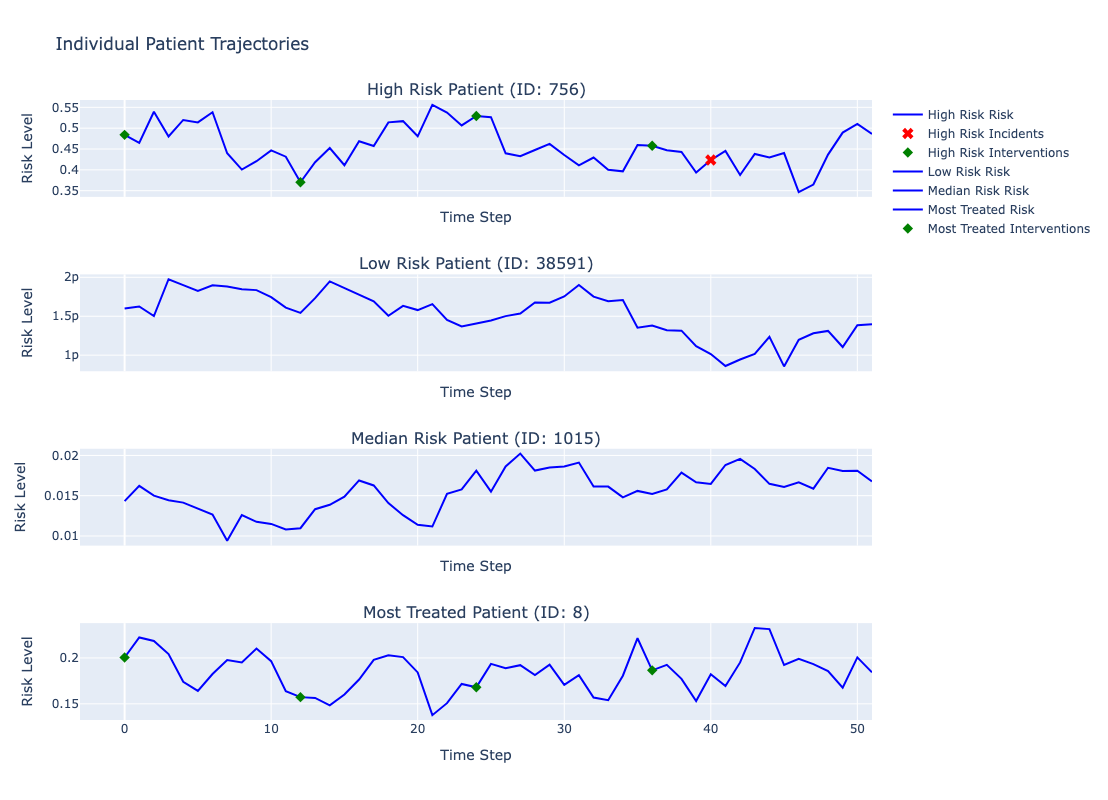

🧑‍⚕️ Patient Trajectory Summary:
   High Risk (ID 756):
     Base risk: 0.483949
     Total incidents: 1
     Total interventions: 4
   Low Risk (ID 38591):
     Base risk: 0.000000
     Total incidents: 0
     Total interventions: 0
   Median Risk (ID 1015):
     Base risk: 0.014320
     Total incidents: 0
     Total interventions: 0
   Most Treated (ID 8):
     Base risk: 0.200462
     Total incidents: 0
     Total interventions: 4


In [31]:
# Patient trajectory analysis
if all(key in data for key in ['patient_risks', 'temporal_matrix', 'incidents', 'interventions']):
    # Select interesting patients for trajectory analysis
    risks = data['patient_risks']['base_risk']
    
    # Find patients with different risk profiles
    high_risk_patient = risks.idxmax()
    low_risk_patient = risks.idxmin()
    median_risk_patient = risks.median()
    median_risk_idx = (risks - median_risk_patient).abs().idxmin()
    
    # Find a patient who had interventions
    intervention_patients = data['interventions'].sum(axis=1)
    if intervention_patients.sum() > 0:
        treated_patient = intervention_patients.idxmax()
    else:
        treated_patient = None
    
    # Create patient trajectory plots
    patients_to_plot = {
        'High Risk': high_risk_patient,
        'Low Risk': low_risk_patient,
        'Median Risk': median_risk_idx
    }
    
    if treated_patient is not None:
        patients_to_plot['Most Treated'] = treated_patient
    
    fig = make_subplots(
        rows=len(patients_to_plot), cols=1,
        subplot_titles=[f"{name} Patient (ID: {idx})" for name, idx in patients_to_plot.items()],
        shared_xaxes=True
    )
    
    time_steps = list(range(len(data['temporal_matrix'].columns)))
    
    for row, (name, patient_idx) in enumerate(patients_to_plot.items(), 1):
        # Get patient data
        patient_risks = data['temporal_matrix'].iloc[patient_idx]
        patient_incidents = data['incidents'].iloc[patient_idx]
        patient_interventions = data['interventions'].iloc[patient_idx]
        
        # Plot temporal risk
        fig.add_trace(
            go.Scatter(
                x=time_steps,
                y=patient_risks,
                mode='lines',
                name=f'{name} Risk',
                line=dict(color='blue')
            ),
            row=row, col=1
        )
        
        # Mark incidents
        incident_times = [t for t, incident in enumerate(patient_incidents) if incident]
        if incident_times:
            incident_risks = [patient_risks.iloc[t] for t in incident_times]
            fig.add_trace(
                go.Scatter(
                    x=incident_times,
                    y=incident_risks,
                    mode='markers',
                    name=f'{name} Incidents',
                    marker=dict(color='red', size=10, symbol='x')
                ),
                row=row, col=1
            )
        
        # Mark interventions
        intervention_times = [t for t, intervention in enumerate(patient_interventions) if intervention]
        if intervention_times:
            intervention_risks = [patient_risks.iloc[t] for t in intervention_times]
            fig.add_trace(
                go.Scatter(
                    x=intervention_times,
                    y=intervention_risks,
                    mode='markers',
                    name=f'{name} Interventions',
                    marker=dict(color='green', size=8, symbol='diamond')
                ),
                row=row, col=1
            )
    
    fig.update_layout(
        height=200 * len(patients_to_plot),
        title_text="Individual Patient Trajectories",
        showlegend=True
    )
    
    fig.update_xaxes(title_text="Time Step")
    fig.update_yaxes(title_text="Risk Level")
    
    fig.show()
    
    # Print trajectory summaries
    print("🧑‍⚕️ Patient Trajectory Summary:")
    for name, patient_idx in patients_to_plot.items():
        base_risk = risks.iloc[patient_idx]
        total_incidents = data['incidents'].iloc[patient_idx].sum()
        total_interventions = data['interventions'].iloc[patient_idx].sum()
        
        print(f"   {name} (ID {patient_idx}):")
        print(f"     Base risk: {base_risk:.6f}")
        print(f"     Total incidents: {total_incidents}")
        print(f"     Total interventions: {total_interventions}")
else:
    print("❌ Patient trajectory data not available")

## 💡 Recommendations {#recommendations}

In [32]:
# Generate actionable recommendations
print("💡 ACTIONABLE RECOMMENDATIONS")
print("="*50)

recommendations = []

if stats:
    # Check intervention coverage
    int_stats = stats.get('intervention_statistics', {})
    coverage = int_stats.get('intervention_coverage', 0)
    
    if coverage < 0.05:
        recommendations.append(
            f"📈 INCREASE INTERVENTION COVERAGE: Current coverage is {coverage:.1%}, "
            f"which is below the recommended 5-50% range. Consider lowering the ML threshold."
        )
    elif coverage > 0.5:
        recommendations.append(
            f"📉 REDUCE INTERVENTION COVERAGE: Current coverage is {coverage:.1%}, "
            f"which may be too high. Consider raising the ML threshold to focus on highest-risk patients."
        )
    else:
        recommendations.append(
            f"✅ INTERVENTION COVERAGE OPTIMAL: Current coverage of {coverage:.1%} is within the recommended range."
        )
    
    # Check incident reduction
    cf_stats = stats.get('counterfactual_statistics', {})
    incident_reduction = cf_stats.get('incident_reduction', 0)
    
    if incident_reduction <= 0:
        recommendations.append(
            "⚠️ NEGATIVE EFFECTIVENESS: Interventions appear to increase incidents. "
            "Consider: (1) Increasing intervention effectiveness parameter, "
            "(2) Improving ML model calibration, (3) Different assignment strategy."
        )
    elif incident_reduction < 0.1:
        recommendations.append(
            f"📊 LOW EFFECTIVENESS: Current reduction is {incident_reduction:.1%}. "
            f"Consider increasing intervention effectiveness parameter or improving targeting."
        )
    else:
        recommendations.append(
            f"✅ GOOD EFFECTIVENESS: Achieving {incident_reduction:.1%} incident reduction."
        )
    
    # Check ML performance
    ml_stats = stats.get('ml_prediction_statistics', {})
    if ml_stats:
        mean_score = ml_stats.get('mean_ml_score', 0)
        positive_rate = ml_stats.get('positive_prediction_rate', 0)
        
        if mean_score < 0.3:
            recommendations.append(
                f"🤖 LOW ML SCORES: Mean prediction score is {mean_score:.3f}. "
                f"Consider adjusting target PPV/sensitivity parameters."
            )
        
        if positive_rate < 0.1 or positive_rate > 0.9:
            recommendations.append(
                f"⚖️ UNBALANCED PREDICTIONS: {positive_rate:.1%} positive predictions. "
                f"Consider adjusting ML calibration for better balance."
            )
    
    # Check validation failures
    validation = stats.get('validation_results', {})
    failed_checks = [check for check, passed in validation.items() if not passed]
    
    if failed_checks:
        recommendations.append(
            f"✅ VALIDATION FAILURES: {', '.join(failed_checks)}. "
            f"Review simulation parameters to meet validation criteria."
        )
    
    # Performance optimization suggestions
    sim_params = stats.get('simulation_parameters', {})
    n_patients = sim_params.get('n_patients', 0)
    n_timesteps = sim_params.get('n_timesteps', 0)
    
    if n_patients > 50000 or n_timesteps > 100:
        recommendations.append(
            "⚡ PERFORMANCE: For faster iterations during development, "
            "consider reducing population size or timesteps for initial testing."
        )

# Print recommendations
if recommendations:
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec}")
else:
    print("\n✅ Results look good! No major issues identified.")

print(f"\n📁 All analysis results available in: {RESULTS_DIR}")
print("\n🎉 Interactive analysis complete!")

💡 ACTIONABLE RECOMMENDATIONS

1. 📈 INCREASE INTERVENTION COVERAGE: Current coverage is 1.1%, which is below the recommended 5-50% range. Consider lowering the ML threshold.

2. 📊 LOW EFFECTIVENESS: Current reduction is 6.9%. Consider increasing intervention effectiveness parameter or improving targeting.

3. 🤖 LOW ML SCORES: Mean prediction score is 0.272. Consider adjusting target PPV/sensitivity parameters.

4. ✅ VALIDATION FAILURES: intervention_coverage. Review simulation parameters to meet validation criteria.

📁 All analysis results available in: ../outputs/baseline_simulation/

🎉 Interactive analysis complete!


## 🚀 Next Steps

Based on this analysis, consider:

1. **Parameter Tuning**: Use the recommendations above to adjust simulation parameters
2. **Scenario Testing**: Run multiple configurations to compare effectiveness
3. **Sensitivity Analysis**: Test how results change with different parameters
4. **Real-World Validation**: Compare simulated results with actual clinical data

### Running New Experiments

```bash
# Try different parameters
python experiments/run_baseline_simulation.py \
    intervention.threshold=0.3 \
    ml_model.target_ppv=0.4

# Analyze new results
python analyze_results.py outputs/baseline_simulation/
```